# EDA

In [1]:
#lets get crackn
import os
import chardet #for detecting encoding
from email import policy
from email.parser import BytesParser
#^^these two above work for MIME format^^
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer #vectoring is after preporcessing
from sklearn.model_selection import train_test_split
import gensim
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import mimetypes
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
#download stuff for nltk if need be
#nltk.download('stopwords')
#^^this is to update stopwords^^

In [2]:
# making all ham and spam dataframe  
ham_spam_all_portStemm = pd.read_csv("Resources/processed_emails/ham_spam_portStemm.csv")
#lets shuffle
shuffled_emails_portStemm = ham_spam_all_portStemm.sample(frac=1, random_state=41).reset_index(drop=True)
shuffled_emails_portStemm = shuffled_emails_portStemm.drop(columns=['text_content'])
shuffled_emails_portStemm

,label,port_stem_processed
0,spam,forkadminxentcom thu aug 8 180404 2002 returnp...
1,ham,forkadminxentcom mon sep 9 104627 2002 returnp...
2,ham,forkadminxentcom wed sep 25 102454 2002 return...
3,ham,ilugadminlinuxi fri jul 19 171450 2002 returnp...
4,spam,mraimecoilcipcmsncom mon jul 22 183925 2002 re...
...,...,...
5795,ham,rpmlistadminfreshrpmsnet fri jul 26 111510 200...
5796,ham,forkadminxentcom mon sep 23 224747 2002 return...
5797,ham,forkadminxentcom mon aug 26 153153 2002 return...
5798,spam,receiv hqpronsnet localhost 127001 hqpronsnet ...


In [3]:
#lets split up the data of 5800 rows of two columns
seventy_five_dataset = shuffled_emails_portStemm.iloc[1:4350,:] # we use : to include all columns
seventy_five_dataset = seventy_five_dataset.reset_index(drop=True)
twenty_five_dataset = shuffled_emails_portStemm.iloc[4351:5800,:]
twenty_five_dataset = twenty_five_dataset.reset_index(drop=True)
seventy_five_dataset, twenty_five_dataset

(     label                                port_stem_processed
 0      ham  forkadminxentcom mon sep 9 104627 2002 returnp...
 1      ham  forkadminxentcom wed sep 25 102454 2002 return...
 2      ham  ilugadminlinuxi fri jul 19 171450 2002 returnp...
 3     spam  mraimecoilcipcmsncom mon jul 22 183925 2002 re...
 4      ham  rssfeedsjmasonorg wed sep 25 102324 2002 retur...
 ...    ...                                                ...
 4344   ham  forkadminxentcom fri sep 6 183554 2002 returnp...
 4345  spam  beautyinfufuxxxmeb13mxyaolcom tue oct 8 110232...
 4346  spam  receiv hqpronsnet localhost 127001 hqpronsnet ...
 4347   ham  forkadminxentcom mon aug 12 110907 2002 return...
 4348   ham  nobodysonicspamtrapstaintorg wed aug 7 143904 ...
 
 [4349 rows x 2 columns],
      label                                port_stem_processed
 0      ham  forkadminxentcom wed oct 9 105517 2002 returnp...
 1      ham  returnpath gwardpythonnet deliveryd wed sep 11...
 2      ham  forkadminxentc

In [4]:
#put words into list
shuffled_emails_portStemm['port_stem_processed'] = shuffled_emails_portStemm['port_stem_processed'].str.split()

In [5]:
import pandas as pd
from collections import Counter
spam_messages = shuffled_emails_portStemm[shuffled_emails_portStemm["label"] == "spam"]
ham_messages = shuffled_emails_portStemm[shuffled_emails_portStemm["label"] == "ham"]

In [6]:
spam_words = Counter([word for sublist in spam_messages['port_stem_processed'] for word in sublist])
ham_words = Counter([word for sublist in ham_messages['port_stem_processed'] for word in sublist])

In [7]:
top_20_spam_words = spam_words.most_common(20)
top_20_ham_words = ham_words.most_common(20)

In [8]:
#lets print
print("Top 20 Spam Words:")
for word, count in top_20_spam_words:
    print(f"{word}: {count}")

Top 20 Spam Words:
2002: 12170
receiv: 10279
td: 10259
tr: 8203
id: 6318
br: 4549
jul: 4416
tabl: 4223
esmtp: 4207
font: 4189
email: 4012
0100: 3909
p: 3280
localhost: 3105
helvetica: 2847
mon: 2622
aug: 2585
may: 2566
face3dari: 2365
subject: 2353


In [9]:
#lets print
print("\nTop 20 Ham Words:")
for word, count in top_20_ham_words:
    print(f"{word}: {count}")


Top 20 Ham Words:
2002: 34312
receiv: 23731
id: 17969
esmtp: 14515
0100: 12513
localhost: 12444
aug: 12163
127001: 10951
sep: 9986
postfix: 7454
jmlocalhost: 6929
wed: 6370
mon: 6212
ist: 5760
tue: 5669
thu: 5594
jul: 5555
deliveredto: 5341
0400: 5239
oct: 5137


In [12]:
spam_words_df = pd.DataFrame(top_20_spam_words)
print(spam_words_df)

            0      1
0        2002  12170
1      receiv  10279
2          td  10259
3          tr   8203
4          id   6318
5          br   4549
6         jul   4416
7        tabl   4223
8       esmtp   4207
9        font   4189
10      email   4012
11       0100   3909
12          p   3280
13  localhost   3105
14  helvetica   2847
15        mon   2622
16        aug   2585
17        may   2566
18  face3dari   2365
19    subject   2353


In [26]:
spam_words_df.columns = ['word', 'frequency'] 

In [27]:
ham_words_df = pd.DataFrame(top_20_ham_words)
ham_words_df.columns = ['word', 'frequency'] 
print(ham_words_df)

           word  frequency
0          2002      34312
1        receiv      23731
2            id      17969
3         esmtp      14515
4          0100      12513
5     localhost      12444
6           aug      12163
7        127001      10951
8           sep       9986
9       postfix       7454
10  jmlocalhost       6929
11          wed       6370
12          mon       6212
13          ist       5760
14          tue       5669
15          thu       5594
16          jul       5555
17  deliveredto       5341
18         0400       5239
19          oct       5137


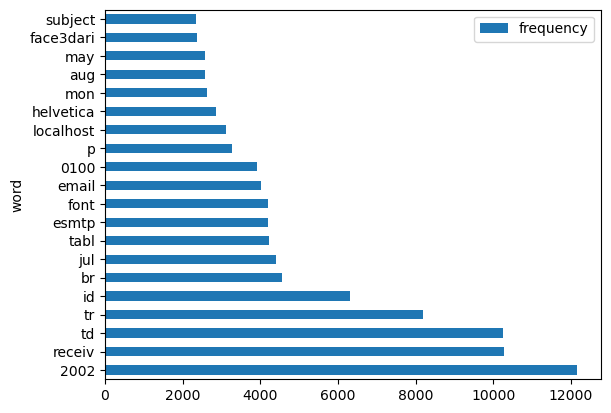

In [37]:
spam = spam_words_df.plot.barh(x='word', y='frequency',rot=0)

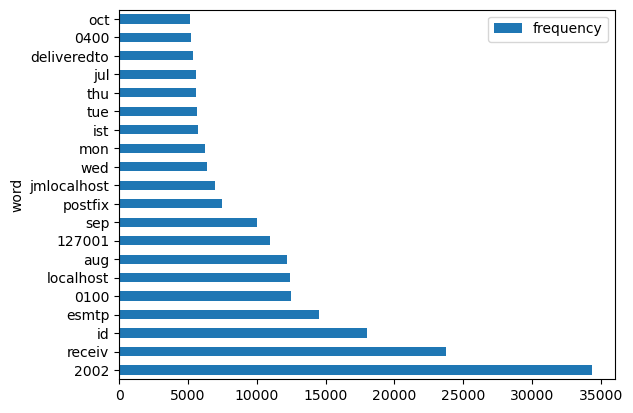

In [36]:
ham = ham_words_df.plot.barh(x='word', y='frequency',rot=0)